In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

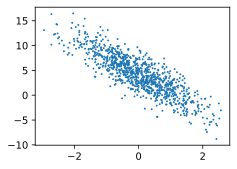

In [4]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.2455,  0.8651],
        [ 1.4353,  0.2270],
        [ 0.0617,  0.3996],
        [-1.5440, -2.1719],
        [ 0.3280, -0.8475],
        [-1.7129, -0.6516],
        [ 0.4428,  1.0978],
        [ 0.2803,  0.2587],
        [ 0.6182,  0.5374],
        [ 0.8717, -0.0245]]) 
 tensor([[3.7431],
        [6.2907],
        [2.9641],
        [8.4912],
        [7.7323],
        [2.9978],
        [1.3498],
        [3.8671],
        [3.6212],
        [6.0138]])
